In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:

car_data=pd.read_csv("Users\yahya\Downloads\car data.csv")
import os
os.getcwd()

FileNotFoundError: [Errno 2] No such file or directory: 'Users\\yahya\\Downloads\\car data.csv'

In [14]:
import os
os.getcwd()

'C:\\Users\\yahya'

In [15]:
car_data=pd.read_csv('car data.csv')

In [16]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [20]:
car_data.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [21]:
print(car_data['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [22]:
print(car_data['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [23]:
print(car_data['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [26]:
fuel_type=car_data['Fuel_Type']

In [25]:
seller_type= car_data['Seller_Type']

In [27]:
transmission_type=car_data['Transmission']

In [28]:
selling_price=car_data['Selling_Price']

In [29]:
from matplotlib import style
style.use('ggplot')
fig=plt.figure(figsize=(15,5))

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

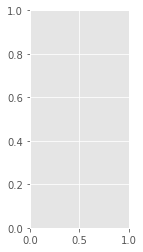

In [30]:
fig.suptitle('Visualizing categorical data coloumns')
plt.subplot(1,3,1)



<AxesSubplot:>

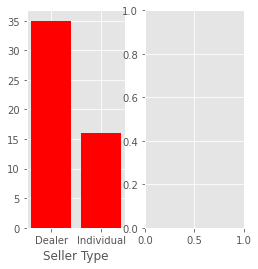

In [31]:
plt.bar(fuel_type,selling_price,color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price,color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)

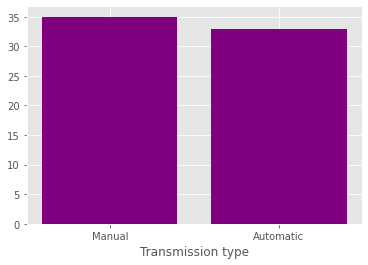

In [32]:
plt.bar(transmission_type,selling_price,color='purple')
plt.xlabel('Transmission type')
plt.show()

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

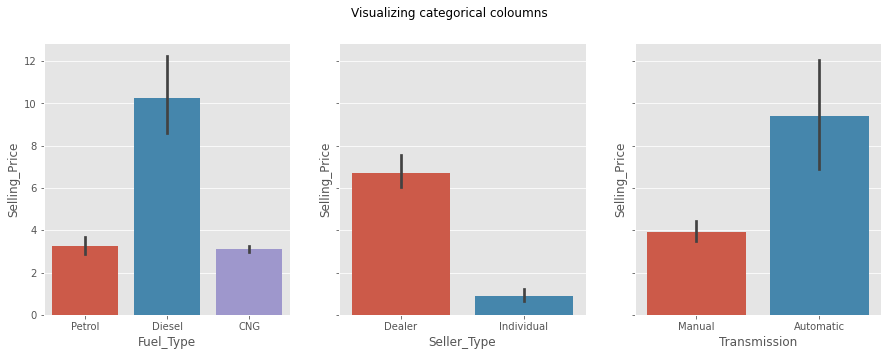

In [33]:
fig,axes=plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical coloumns')
sns.barplot(x=fuel_type,y=selling_price,ax=axes[0])
sns.barplot(x=seller_type,y=selling_price,ax=axes[1])
sns.barplot(x=transmission_type,y=selling_price,ax=axes[2])


In [34]:
petrol_data=car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe

<bound method NDFrame.describe of      Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0        ritz  2014           3.35           5.59       27000    Petrol   
2        ciaz  2017           7.25           9.85        6900    Petrol   
3     wagon r  2011           2.85           4.15        5200    Petrol   
6        ciaz  2015           6.75           8.12       18796    Petrol   
10   alto 800  2017           2.85           3.60        2135    Petrol   
..        ...   ...            ...            ...         ...       ...   
293      city  2010           3.25           9.90       38000    Petrol   
294     amaze  2014           3.75           6.80       33019    Petrol   
297      brio  2015           4.00           5.90       60000    Petrol   
298      city  2009           3.35          11.00       87934    Petrol   
300      brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manua

In [35]:
seller_data=car_data.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


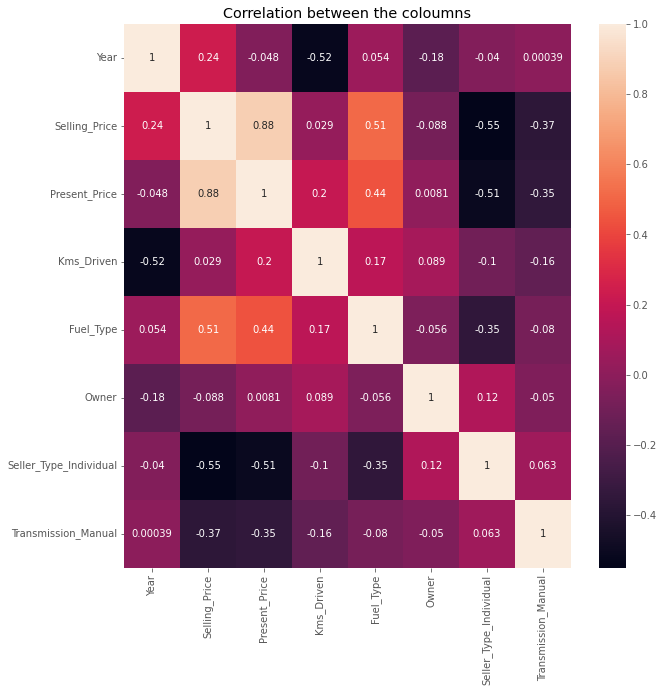

In [40]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data=pd.get_dummies(car_data,columns=['Seller_Type','Transmission'],drop_first=True)
plt.figure(figsize=(10,10))
sns.heatmap(car_data.corr(),annot=True)
plt.title("Correlation between the coloumns")
plt.show()

<AxesSubplot:title={'center':'Correlation betwwn present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

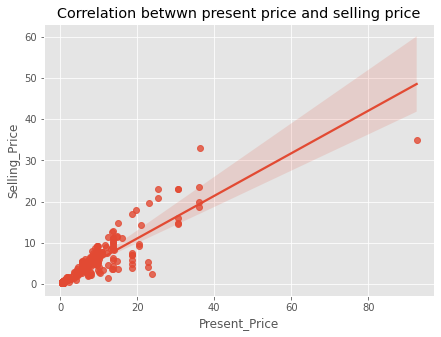

In [41]:
fig=plt.figure(figsize=(7,5))
plt.title("Correlation betwwn present price and selling price")
sns.regplot(x="Present_Price",y='Selling_Price',data=car_data)


In [42]:
X=car_data.drop(['Car_Name',"Selling_Price"],axis=1)
y=car_data['Selling_Price']
print("Shape of X is ",X.shape)
print("Shape of y is ",y.shape)


Shape of X is  (301, 7)
Shape of y is  (301,)


In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [44]:
print("X test shape",X_test.shape)
print("X_train shape",X_train.shape)
print("y_test shape",y_test.shape)
print("y_train shape",y_train.shape)


X test shape (91, 7)
X_train shape (210, 7)
y_test shape (91,)
y_train shape (210,)


In [46]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)


MAE: 1.2581404706473376
MSE: 3.49328602622515
R2 score:  0.8294933369778814


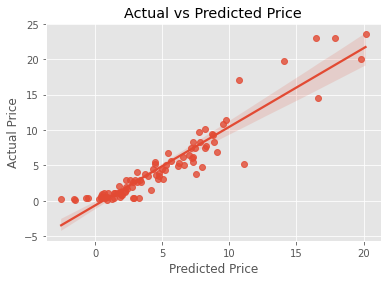

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE:",(metrics.mean_absolute_error(pred,y_test)))
print("MSE:",(metrics.mean_squared_error(pred,y_test)))
print("R2 score: " ,(metrics.r2_score(pred,y_test)))
sns.regplot(x=pred,y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()